In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
def getGrad(f, x, d = 1e-5, param = None):
    N = x.shape[-1]
    grad = np.zeros(x.shape)
    x_sup = np.copy(x)
    x_inf = np.copy(x)
    for i in range(N):
        x_sup[i] += d/2
        x_inf[i] -= d/2
        grad[i] = (f(x_sup, param) - f(x_inf, param)) / d
        x_sup[i] -= d/2
        x_inf[i] += d/2
    return grad



def boundaryMax(f, x0, df = None, max_step = 1000, threshold = 1e-4, dt = 1e-5, param = None):
    delta = 10
    step = 0
    x = np.copy(x0)
    inertia = np.zeros(x.shape)
    maxChange = 0.3
    while step < max_step and delta > threshold:
        if df is not None:
            gradf = df(x, param)
        else:
            gradf = getGrad(f, x, param=param)
        perpGradf = np.dot(x, gradf) * x
        alongGradf = gradf - perpGradf
        effective_inertia = inertia - np.dot(x, inertia) * x
        total_change = alongGradf + effective_inertia
        total_change *= maxChange * (1 / (1 + np.exp(- 2 * np.linalg.norm(total_change) * dt)) - 0.5) / (np.linalg.norm(total_change) * dt)
        inertia = np.copy(total_change)
        delta = np.linalg.norm(total_change)
        x += total_change
        x /= np.linalg.norm(x)
        step += 1
    if(delta <= threshold):
        print(f"threshold reached in {step} steps")
    if(step == max_step):
        print(f"maximal number of steps reached. Last improvement length = {delta}")
    else:
        print(f"final improvement = {delta}")
    return x



In [150]:
def testF(x, max_loc = None):
    if max_loc is None:
        max_loc = np.zeros(x.shape)
    N = x.shape[0]
    res = 1
    for i in range(N):
        res -= (x[i] - max_loc[i]) ** 2
    return res

def testGradF(x, max_loc = None):
    if max_loc is None:
        max_loc = np.zeros(x.shape)
    return -2 * (x - max_loc)

maximal number of steps reached. Last improvement length = 0.1689852383087293
maximal number of steps reached. Last improvement length = 0.18755421545098128
maximal number of steps reached. Last improvement length = 0.2019973799251157
maximal number of steps reached. Last improvement length = 0.20986134064000528
maximal number of steps reached. Last improvement length = 0.20934391472544767
maximal number of steps reached. Last improvement length = 0.20004128232219662
maximal number of steps reached. Last improvement length = 0.18324855824700645
maximal number of steps reached. Last improvement length = 0.16154821770946035
maximal number of steps reached. Last improvement length = 0.13790320150477905
maximal number of steps reached. Last improvement length = 0.11479759156606904
maximal number of steps reached. Last improvement length = 0.09382125253437701
maximal number of steps reached. Last improvement length = 0.07570235003389748
maximal number of steps reached. Last improvement leng

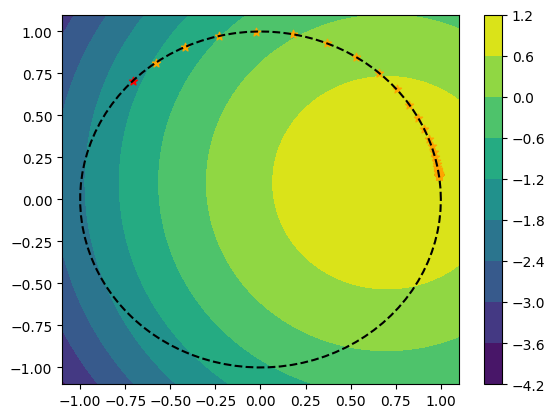

threshold reached in 48 steps
final improvement = 8.755715309449742e-07
[0.98994915 0.14142374]


In [162]:
xlist = np.linspace(-1.1, 1.1, 100)
ylist = np.linspace(-1.1, 1.1, 100)
X, Y = np.meshgrid(xlist, ylist)
x = np.array([X, Y])
max_loc = np.array([0.7, 0.1])
Z = testF(x, max_loc)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
angles = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(angles), np.sin(angles), color="black", linestyle="--")
fig.colorbar(cp) # Add a colorbar to a plot

max_x0 = np.array([-np.sqrt(2)/2, np.sqrt(2)/2])
ax.scatter(max_x0[0], max_x0[1], color="red", marker="*")
max_x = np.copy(max_x0)
prev = np.copy(max_x0)
for i in range(80):
    prev = np.copy(max_x)
    max_x= boundaryMax(testF, max_x, df = testGradF, max_step = 1, threshold = 1e-4, dt = 1e-1, param = max_loc)
    ax.scatter(max_x[0], max_x[1], color="orange", marker="*")
plt.show()
final_max = boundaryMax(testF, max_x0, df = testGradF, threshold = 1e-6, dt = 1e-1, param = max_loc)
print(final_max)

In [176]:
x_0 = np.array([1., 1., 1., 1., 1., 1., 1.])
x_0 /= np.linalg.norm(x_0)
max_loc = np.random.rand(x_0.shape[0]) * 2 - 1
print(max_loc)
max_edge_loc = max_loc / np.linalg.norm(max_loc)
final_max = boundaryMax(testF, x_0, df = None, threshold = 1e-9, dt = 1e-1, param = max_loc)
print(max_edge_loc)
print(final_max)
print(np.linalg.norm(final_max-max_edge_loc))

[-0.03010143  0.99773309  0.47624808  0.93674545  0.04785484 -0.13086122
 -0.23224424]
threshold reached in 23 steps
final improvement = 4.693492261509391e-10
[-0.02041522  0.67667671  0.32299819  0.63531403  0.03245583 -0.08875193
 -0.15751133]
[-0.02041522  0.67667671  0.32299819  0.63531403  0.03245583 -0.08875193
 -0.15751133]
3.207388101523351e-10
